<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Données" data-toc-modified-id="Données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Données</a></span><ul class="toc-item"><li><span><a href="#Données-hospitalieres" data-toc-modified-id="Données-hospitalieres-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Données hospitalieres</a></span></li></ul></li><li><span><a href="#Analyses" data-toc-modified-id="Analyses-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyses</a></span><ul class="toc-item"><li><span><a href="#heatmap-réanimations-par-age" data-toc-modified-id="heatmap-réanimations-par-age-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>heatmap réanimations par age</a></span></li><li><span><a href="#Heat-map-reanimation-par-departement" data-toc-modified-id="Heat-map-reanimation-par-departement-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Heat map reanimation par departement</a></span></li><li><span><a href="#Nouveau-cas-positifs" data-toc-modified-id="Nouveau-cas-positifs-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Nouveau cas positifs</a></span><ul class="toc-item"><li><span><a href="#Analyses-nationales" data-toc-modified-id="Analyses-nationales-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Analyses nationales</a></span><ul class="toc-item"><li><span><a href="#Version-Fabien_l-:-%par-rapport-à-J-7-(lissage-7-jours)" data-toc-modified-id="Version-Fabien_l-:-%par-rapport-à-J-7-(lissage-7-jours)-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Version Fabien_l : %par rapport à J-7 (lissage 7 jours)</a></span></li><li><span><a href="#Ma-version-:-%par-rapport-à-J-7-(total-sur-7-jours)" data-toc-modified-id="Ma-version-:-%par-rapport-à-J-7-(total-sur-7-jours)-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Ma version : %par rapport à J-7 (total sur 7 jours)</a></span></li><li><span><a href="#Total-test-(methode-Fabien_L)" data-toc-modified-id="Total-test-(methode-Fabien_L)-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>Total test (methode Fabien_L)</a></span></li><li><span><a href="#Comparaison-nombre-de-tests-et-positifs" data-toc-modified-id="Comparaison-nombre-de-tests-et-positifs-2.3.1.4"><span class="toc-item-num">2.3.1.4&nbsp;&nbsp;</span>Comparaison nombre de tests et positifs</a></span></li><li><span><a href="#Analyse-de-l'accéleration" data-toc-modified-id="Analyse-de-l'accéleration-2.3.1.5"><span class="toc-item-num">2.3.1.5&nbsp;&nbsp;</span>Analyse de l'accéleration</a></span></li></ul></li><li><span><a href="#Analyse-départementales" data-toc-modified-id="Analyse-départementales-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Analyse départementales</a></span></li></ul></li><li><span><a href="#Taux-de-positivité" data-toc-modified-id="Taux-de-positivité-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Taux de positivité</a></span></li></ul></li><li><span><a href="#reevaluation-de-cas-positif" data-toc-modified-id="reevaluation-de-cas-positif-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>reevaluation de cas positif</a></span></li></ul></div>

# Données #

Jeu de données SPF data gouv

## Données hospitalieres ##

Par classe d'age
https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3


# Analyses #

## heatmap réanimations par age ##

In [1]:
#Ouverture du fichier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3', sep=';')
print(len(df))

49104


In [2]:
rea=df[['jour', 'cl_age90','rea']]

In [3]:
rea2=rea.pivot_table(index='cl_age90', columns='jour', values='rea', aggfunc='sum')
rea2[rea2 <= 0] = 1
#print(rea2)

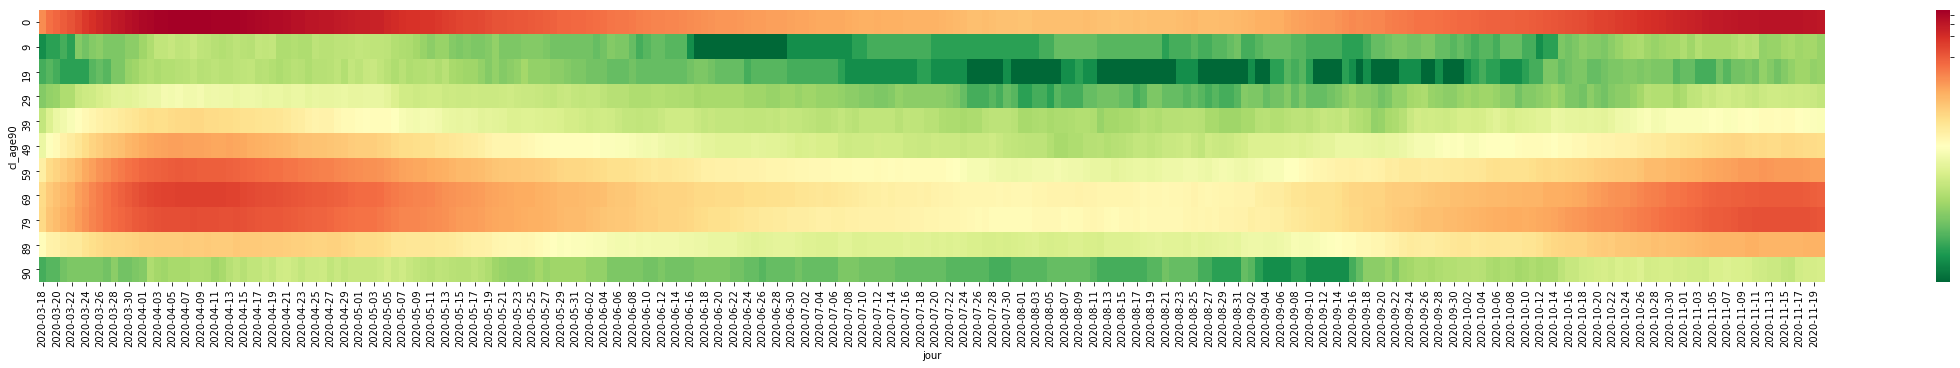

In [4]:
from matplotlib.colors import LogNorm
plt.subplots(figsize=(40,5))
sns.heatmap(rea2, norm=LogNorm(vmin=rea2.min(), vmax=rea2.max()), cmap="RdYlGn_r")
plt.show()


In [5]:
#calcul du delta journalier
delta=rea2.diff(axis=1)
delta= delta.fillna(0)
delta=delta.drop(delta.index[0])
#print(delta)

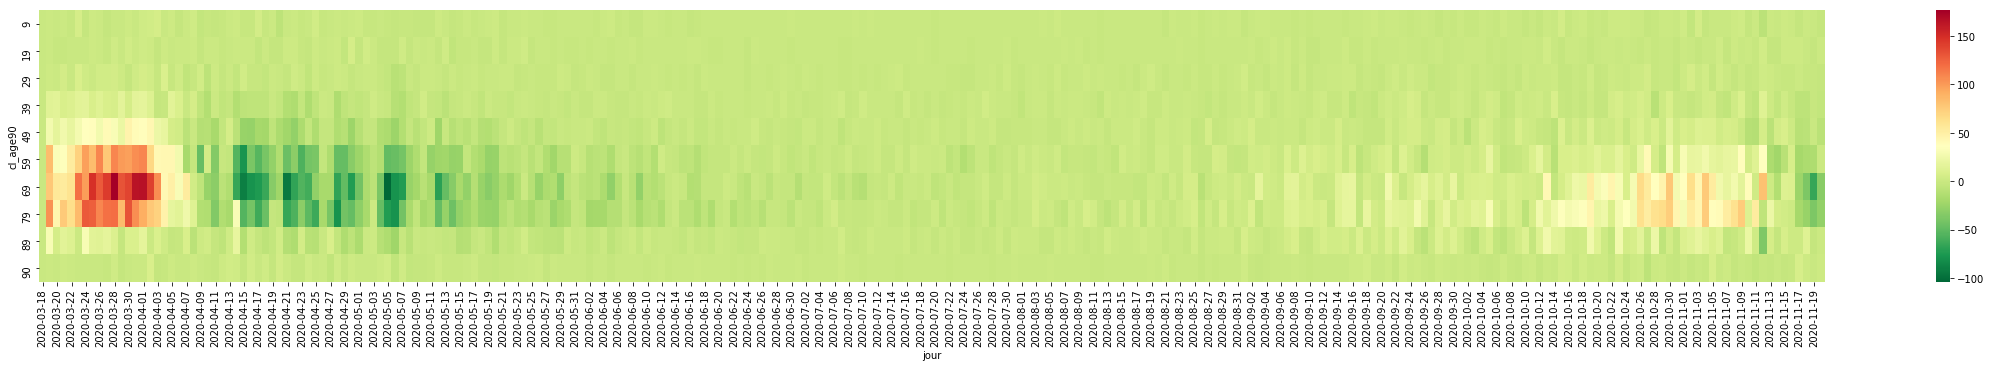

In [6]:
plt.subplots(figsize=(40,5))
sns.heatmap(delta, cmap="RdYlGn_r")
plt.show()

In [7]:
#analyse sur les 60 derniers jours
delta2=delta[delta.columns[-60:]]

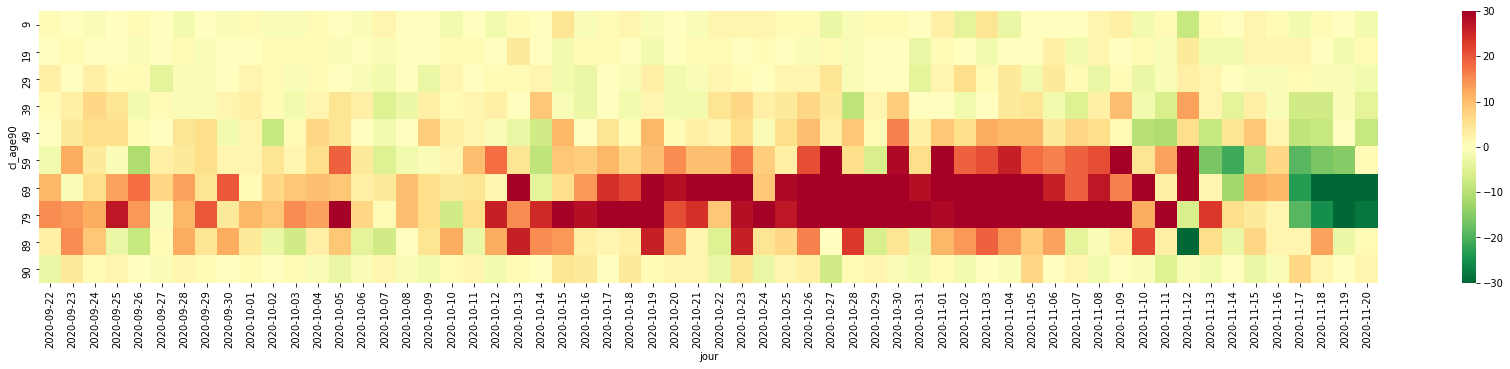

In [8]:
plt.subplots(figsize=(30,5))
sns.heatmap(delta2, cmap="RdYlGn_r",vmin=-30, vmax=30)
plt.show()

In [9]:
rea3=delta.T
#print (rea3)

In [10]:
delta_lissé = rea3.rolling(window=7).mean()
delta_lissé= delta_lissé.fillna(0)
#print(delta_lissé)

In [11]:
delta_lisse2=delta_lissé.drop(delta_lissé.index[:104])
delta_lisse2=delta_lisse2.T
#print(delta_lisse2)

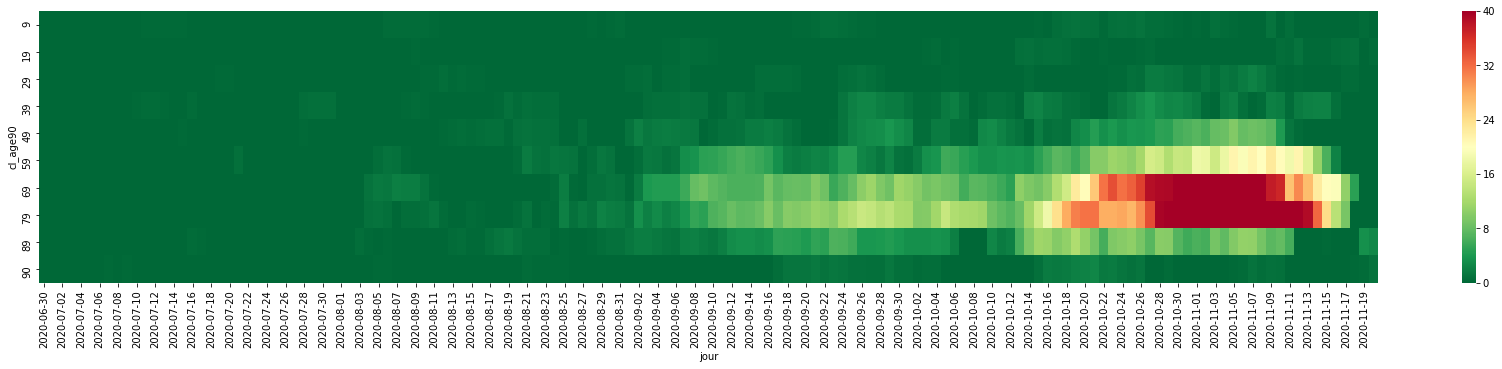

In [12]:
plt.subplots(figsize=(30,5))
sns.heatmap(delta_lisse2, cmap="RdYlGn_r",vmin=0, vmax=40)
plt.show()

## Heat map reanimation par departement ##

In [13]:
df2 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7', sep=';')
print(len(df2))

75144


In [14]:
df2.tail(3)

,dep,sexe,jour,hosp,rea,rad,dc
75141,976,0,2020-11-20,12,5,503,34
75142,976,1,2020-11-20,6,2,241,21
75143,976,2,2020-11-20,5,3,257,13


In [15]:
dep_rea=df2[df2.sexe == 0].pivot_table(index='dep', columns='jour', values='rea', aggfunc='sum')
dep_rea=dep_rea.diff(axis=1)
dep_rea= dep_rea.fillna(0)
dep_rea=dep_rea.T
dep_rea=dep_rea[['06','13','75','92']]
dep_rea=dep_rea.drop(dep_rea.index[:-21])
#dep_rea=dep_rea.drop(dep_rea.index[18:])
dep_rea=dep_rea.T
dep_rea.tail()

jour,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,...,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17,2020-11-18,2020-11-19,2020-11-20
dep,,,,,,,,,,,,,,,,,,,,,
06,4.0,1.0,-4.0,3.0,11.0,2.0,-4.0,1.0,1.0,9.0,...,-3.0,4.0,1.0,2.0,-1.0,-1.0,-4.0,-4.0,-1.0,4.0
13,0.0,5.0,13.0,15.0,9.0,-1.0,21.0,12.0,14.0,3.0,...,6.0,-3.0,2.0,-16.0,3.0,5.0,-3.0,2.0,5.0,-21.0
75,-6.0,10.0,10.0,8.0,5.0,-7.0,5.0,16.0,4.0,21.0,...,5.0,7.0,3.0,-1.0,-3.0,-13.0,-2.0,-4.0,-24.0,-4.0
92,1.0,3.0,4.0,-4.0,18.0,-4.0,0.0,-6.0,11.0,-3.0,...,1.0,2.0,-4.0,-8.0,1.0,-7.0,3.0,-6.0,-1.0,0.0


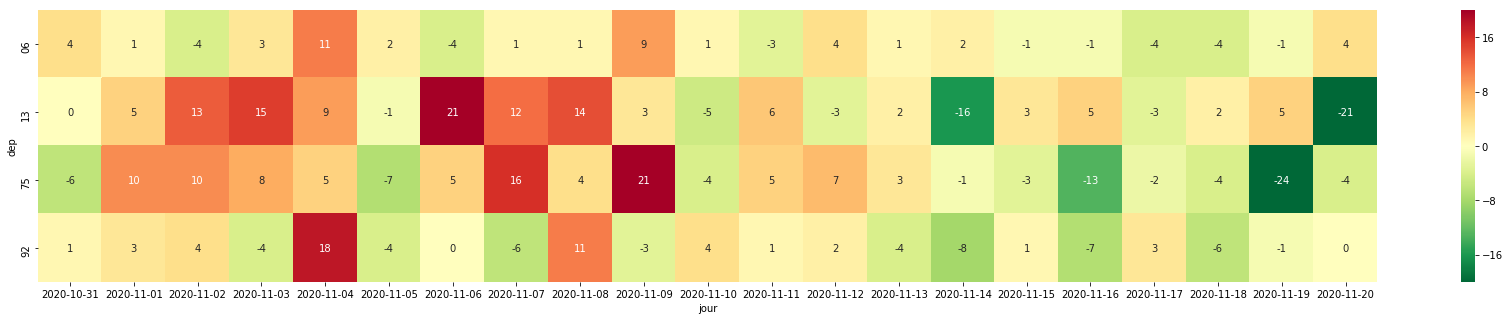

In [16]:
plt.subplots(figsize=(30,5))
sns.heatmap(dep_rea, cmap="RdYlGn_r", annot=True, vmin=-20, vmax=20)
plt.show()

In [17]:
dep_hosp=df2[df2.sexe == 0].pivot_table(index='dep', columns='jour', values='hosp', aggfunc='sum')
dep_hosp=dep_hosp.diff(axis=1)
dep_hosp= dep_hosp.fillna(0)
dep_hosp=dep_hosp.T
dep_hosp=dep_hosp[['06','13','75','92']]
dep_hosp=dep_hosp.drop(dep_hosp.index[:-21])
dep_hosp=dep_hosp.drop(dep_hosp.index[18:])
dep_hosp=dep_hosp.T
dep_hosp.tail()

jour,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14,2020-11-15,2020-11-16,2020-11-17
dep,,,,,,,,,,,,,,,,,,
06,18.0,10.0,-8.0,32.0,29.0,18.0,15.0,17.0,16.0,4.0,-7.0,-7.0,20.0,12.0,26.0,-4.0,7.0,-7.0
13,8.0,65.0,45.0,17.0,46.0,20.0,1.0,51.0,52.0,39.0,-10.0,-7.0,17.0,-27.0,-72.0,24.0,9.0,-64.0
75,18.0,34.0,59.0,52.0,52.0,10.0,-36.0,36.0,21.0,4.0,-39.0,1.0,10.0,1.0,-7.0,24.0,-28.0,-43.0
92,8.0,13.0,26.0,41.0,13.0,12.0,21.0,2.0,17.0,5.0,8.0,-6.0,0.0,-8.0,7.0,18.0,-19.0,-10.0


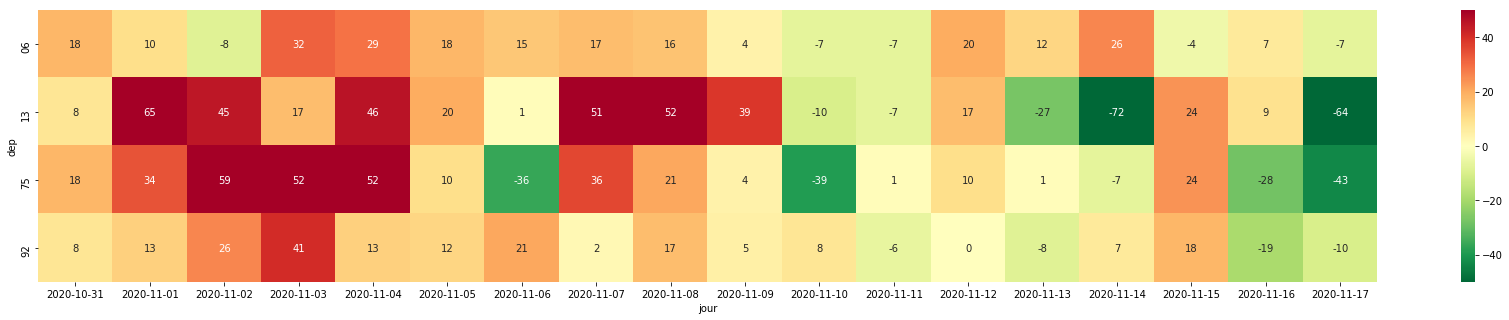

In [18]:
plt.subplots(figsize=(30,5))
sns.heatmap(dep_hosp, cmap="RdYlGn_r", annot=True, vmin=-50, vmax=50)
plt.show()

In [19]:
tot_rea=df2[df2.sexe == 0].pivot_table(index='dep', columns='jour', values='rea', aggfunc='sum')

In [20]:
tot_rea=tot_rea.T
tot_rea=tot_rea[['06','13','75','92']]
tot_rea.tail()

dep,06,13,75,92
jour,,,,
2020-11-16,76,295,310,156
2020-11-17,72,292,308,159
2020-11-18,68,294,304,153
2020-11-19,67,299,280,152
2020-11-20,71,278,276,152


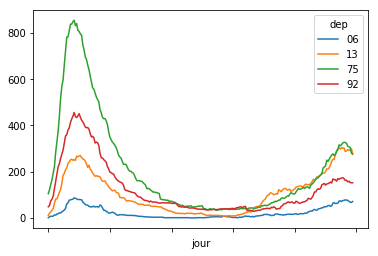

In [21]:
tot_rea.plot.line()
plt.show()

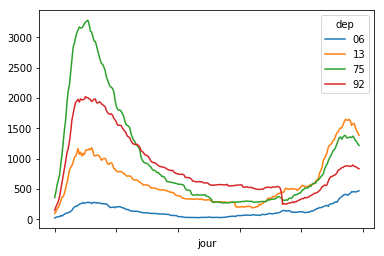

In [22]:
tot_hosp=df2[df2.sexe == 0].pivot_table(index='dep', columns='jour', values='hosp', aggfunc='sum')
tot_hosp=tot_hosp.T
tot_hosp=tot_hosp[['06','13','75','92']]
tot_hosp.plot.line()
plt.show()

In [23]:
tot_hosp.tail(15)

dep,06,13,75,92
jour,,,,
2020-11-06,376,1507,1322,854
2020-11-07,393,1558,1358,856
2020-11-08,409,1610,1379,873
2020-11-09,413,1649,1383,878
2020-11-10,406,1639,1344,886
2020-11-11,399,1632,1345,880
2020-11-12,419,1649,1355,880
2020-11-13,431,1622,1356,872
2020-11-14,457,1550,1349,879


## Nouveau cas positifs ##

In [24]:
df3 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/406c6a23-e283-4300-9484-54e78c8ae675', sep=';')

/Users/vanessa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df3.tail()

,dep,jour,P,T,cl_age90
216211,978,2020-11-17,1,4,69
216212,978,2020-11-17,0,5,79
216213,978,2020-11-17,0,1,89
216214,978,2020-11-17,0,0,90
216215,978,2020-11-17,7,61,0


### Analyses nationales ### 

#### Version Fabien_l : %par rapport à J-7 (lissage 7 jours) ####

In [26]:
test=df3[df3.cl_age90 == 0].groupby(['jour']).sum()

In [27]:
test2=test[['P']]
test2=test2.rolling(window=7).mean()
rate=test2.pct_change(periods=7)
rate=rate.drop(rate.index[:-60])
rate.tail()

,P
jour,
2020-11-13,-0.418093
2020-11-14,-0.425234
2020-11-15,-0.425851
2020-11-16,-0.447541
2020-11-17,-0.468499


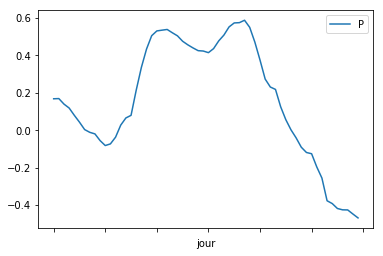

In [28]:
rate.plot.line()
plt.show()

#### Ma version : %par rapport à J-7 (total sur 7 jours) ####

In [29]:
test3=test2.rolling(window=7).sum()
rate2=test3.pct_change(periods=7)
rate2=rate2.drop(rate.index[:-60])
rate2.tail()

,P
jour,
2020-11-13,-0.265478
2020-11-14,-0.308361
2020-11-15,-0.351733
2020-11-16,-0.388308
2020-11-17,-0.419559


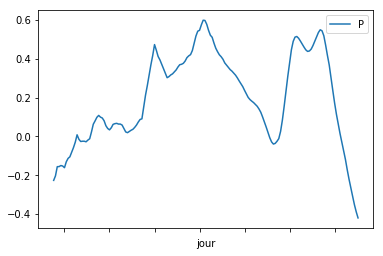

In [30]:
rate2.plot.line()
plt.show()

#### Total test (methode Fabien_L) ####

In [31]:
tot_test=test[['T']]
tot_test=tot_test.rolling(window=7).mean()
tot_test=tot_test.pct_change(periods=7)
tot_test=tot_test.drop(tot_test.index[:-60])
tot_test.tail()

,T
jour,
2020-11-13,-0.292752
2020-11-14,-0.300710
2020-11-15,-0.300770
2020-11-16,-0.328793
2020-11-17,-0.364676


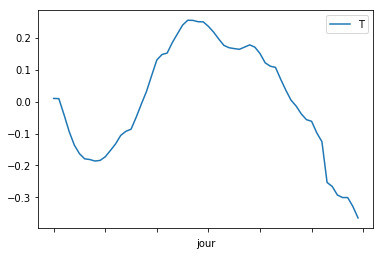

In [32]:
tot_test.plot.line()
plt.show()

#### Comparaison nombre de tests et positifs ####

In [33]:
test4=pd.concat([rate, tot_test]).sort_values('jour')
test4= test4.groupby(['jour']).sum()
test4.tail(15)

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,P,T
jour,,
2020-11-03,0.056770,0.036402
2020-11-04,0.002598,0.005242
2020-11-05,-0.040646,-0.013594
2020-11-06,-0.090546,-0.038250
2020-11-07,-0.118687,-0.056212
2020-11-08,-0.125383,-0.061396
2020-11-09,-0.195844,-0.097546
2020-11-10,-0.255504,-0.125355
2020-11-11,-0.376769,-0.253310


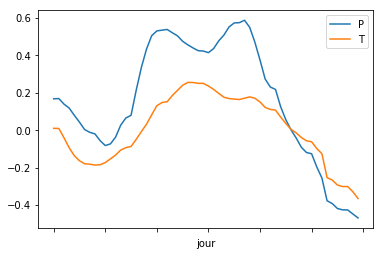

In [34]:
test4.plot.line()
plt.show()

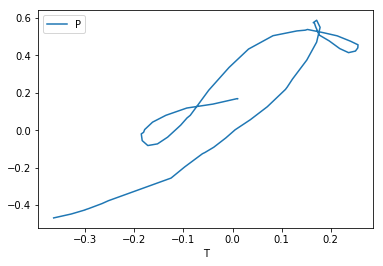

In [35]:
test4.plot.line(x='T', y='P')
plt.show()

#### Analyse de l'accéleration ####

In [36]:
acc=test[['P']]

In [37]:
acc['P2']=acc.diff(axis=0)
acc.tail()

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,P,P2
jour,,
2020-11-13,28417,-7548.0
2020-11-14,10662,-17755.0
2020-11-15,2597,-8065.0
2020-11-16,28271,25674.0
2020-11-17,19645,-8626.0


In [38]:
acc=acc.rolling(window=7).mean()
acc=acc.pct_change(periods=7)
acc=acc.drop(acc.index[:-60])
acc.tail()

,P,P2
jour,,
2020-11-13,-0.418093,0.196565
2020-11-14,-0.425234,-0.168557
2020-11-15,-0.425851,-0.354724
2020-11-16,-0.447541,-0.166748
2020-11-17,-0.468499,-0.209657


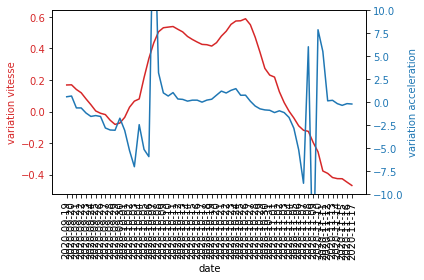

In [39]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date')
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_ylabel('variation vitesse', color=color)
ax1.plot(acc.index.values, acc[['P']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('variation acceleration', color=color)  # we already handled the x-label with ax1
ax2.plot(acc.index.values, acc[['P2']], color=color)
ax2.set_ylim(-10,10)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.xticks(rotation=90)
plt.show()

### Analyse départementales ###

In [40]:
dep_pos=df3[df3.cl_age90 == 0].pivot_table(index='dep', columns='jour', values='P', aggfunc='sum')
#dep_pos=dep_pos.diff(axis=1)
#dep_pos= dep_pos.fillna(0)
dep_pos=dep_pos.T
dep_pos=dep_pos[['06','13',75,92]]
lire=dep_pos[['06','13',75,92]]
dep_pos = dep_pos.rolling(window=7).mean()
dep_pos=dep_pos.pct_change(periods=7)
dep_pos=dep_pos.drop(dep_pos.index[:-40])
#dep_hosp=dep_hosp.drop(dep_hosp.index[18:])
#dep_pos=dep_pos.T
dep_pos.tail(20)

dep,06,13,75,92
jour,,,,
2020-10-29,0.503662,0.213604,0.055285,0.152846
2020-10-30,0.443871,0.104849,-0.023786,0.081909
2020-10-31,0.427301,0.072260,-0.064201,0.038967
2020-11-01,0.412638,0.062068,-0.074537,0.038815
2020-11-02,0.321453,-0.013653,-0.175975,-0.063640
2020-11-03,0.225414,-0.038721,-0.244811,-0.144316
2020-11-04,0.192067,-0.083173,-0.289606,-0.193087
2020-11-05,0.139828,-0.108687,-0.319427,-0.241595
2020-11-06,0.094231,-0.159993,-0.358966,-0.298284


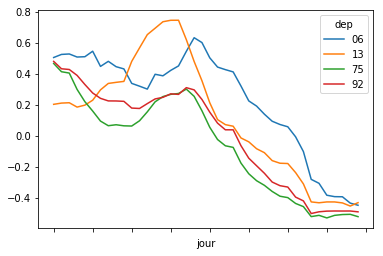

In [41]:
#dep_pos.plot.line()
#plt.style.use('ggplot')
dep_pos.plot()
plt.show()

In [42]:
lire.tail(6)

dep,06,13,75,92
jour,,,,
2020-11-12,537.0,1195.0,725.0,671.0
2020-11-13,421.0,1045.0,515.0,505.0
2020-11-14,139.0,206.0,233.0,201.0
2020-11-15,18.0,74.0,67.0,44.0
2020-11-16,469.0,1026.0,575.0,484.0
2020-11-17,324.0,911.0,385.0,326.0


In [43]:
dep_pos.index.values

array(['2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
       '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
       '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
       '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
       '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
       '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
       '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
       '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
       '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
       '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17'], dtype=object)

In [44]:
#plt.xticks( arange(3), dep_pos.index.values )
#dep_pos.plot()
#plt.show()

In [45]:
dep_pos=df3[df3.cl_age90 == 0].pivot_table(index='dep', columns='jour', values='P', aggfunc='sum')
dep_pos=dep_pos.T
dep_pos = dep_pos.rolling(window=7).mean()
dep_pos=dep_pos.pct_change(periods=7)
dep_pos=dep_pos.drop(dep_pos.index[:-15])
dep_pos=dep_pos.T
dep_pos=dep_pos.diff(axis=1)

In [46]:
#plt.subplots(figsize=(30,100))
#sns.heatmap(dep_pos, cmap="RdYlGn_r", annot=True, vmin=-1, vmax=1)
#plt.show()

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


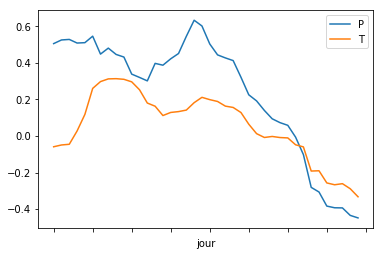

In [47]:
filtre=df3[df3.cl_age90 == 0][df3.dep=='06']
filtre2=filtre[['P','T']]
filtre2.index=filtre['jour']
filtre2 = filtre2.rolling(window=7).mean()
filtre2=filtre2.pct_change(periods=7)
filtre2=filtre2.drop(filtre2.index[:-40])
filtre2.plot()
plt.show()

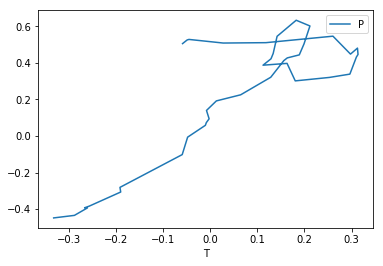

In [48]:
filtre2.plot.line(x='T', y='P')
plt.show()

## Taux de positivité ##

In [49]:
test.head()

,P,T,cl_age90
jour,,,
2020-05-13,889,38625,0
2020-05-14,999,41809,0
2020-05-15,1028,46797,0
2020-05-16,291,16030,0
2020-05-17,139,6202,0


In [50]:
test['taux']=test['P']/test['T']

In [51]:
test.head()

,P,T,cl_age90,taux
jour,,,,
2020-05-13,889,38625,0,0.023016
2020-05-14,999,41809,0,0.023894
2020-05-15,1028,46797,0,0.021967
2020-05-16,291,16030,0,0.018153
2020-05-17,139,6202,0,0.022412


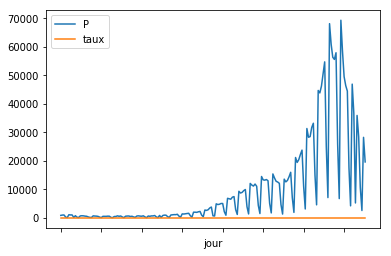

In [52]:
test[['P','taux']].plot()
plt.show()

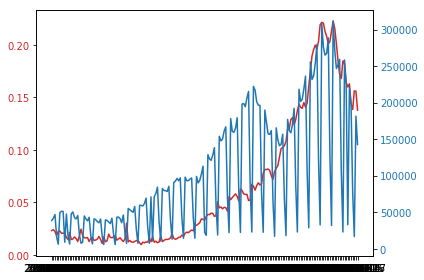

In [53]:
fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(test.index.values, test[['taux']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(test.index.values, test[['T']], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

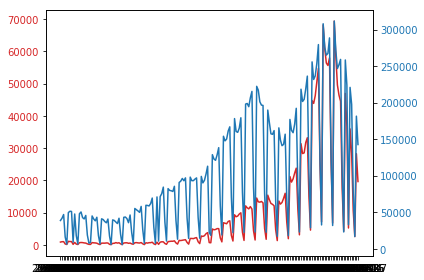

In [54]:
fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(test.index.values, test[['P']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(test.index.values, test[['T']], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [55]:
taux_lisse = test[['taux']].rolling(window=7).mean()

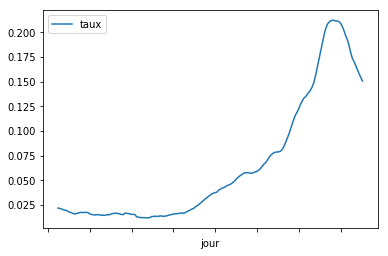

In [56]:
taux_lisse.plot()
plt.show()

In [57]:
taux_lisse.head()

,taux
jour,
2020-05-13,NaN
2020-05-14,NaN
2020-05-15,NaN
2020-05-16,NaN
2020-05-17,NaN


In [58]:
taux_lisse.index = range(0, len(taux_lisse), 1)
taux_lisse= taux_lisse.fillna(0)
taux_lisse.tail()

,taux
184,0.166479
185,0.162277
186,0.158174
187,0.154470
188,0.150656


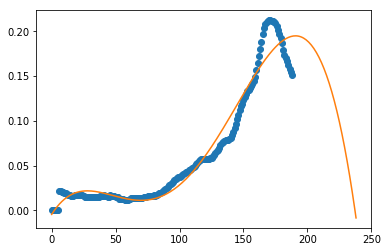

In [59]:
x_data = taux_lisse.index
y_data = taux_lisse['taux']
x_bis=range(0, len(taux_lisse)+50, 1)
p = np.poly1d(np.polyfit(x_data, y_data, 4))
plt.plot(x_data, y_data, 'o', x_bis, p(x_bis), '-')
plt.show()

In [60]:
print(p)

            4             3             2
-1.527e-09 x + 5.874e-07 x - 6.293e-05 x + 0.002275 x - 0.004566


In [61]:
var_tp=taux_lisse.pct_change(periods=7)

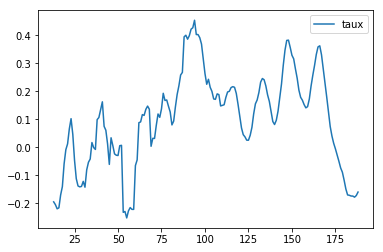

In [62]:
var_tp.plot()
plt.show()

In [63]:
mon=df3[df3.cl_age90 == 0].pivot_table(index='dep', columns='jour', values='P', aggfunc='sum')
mon=mon.T
mon.head()

dep,63,64,65,66,67,68,69,70,71,72,...,54,55,56,57,58,59,60,61,62,63
jour,,,,,,,,,,,,,,,,,,,,,
2020-05-13,NaN,2.0,2.0,0.0,30.0,14.0,20.0,1.0,5.0,2.0,...,23.0,15.0,0.0,35.0,0.0,36.0,4.0,6.0,13.0,3.0
2020-05-14,NaN,0.0,1.0,0.0,22.0,17.0,41.0,5.0,15.0,3.0,...,9.0,8.0,2.0,34.0,0.0,42.0,17.0,5.0,13.0,3.0
2020-05-15,NaN,13.0,6.0,0.0,26.0,15.0,26.0,2.0,9.0,7.0,...,20.0,21.0,2.0,45.0,29.0,30.0,25.0,7.0,9.0,5.0
2020-05-16,NaN,0.0,0.0,0.0,9.0,16.0,12.0,0.0,3.0,4.0,...,1.0,4.0,1.0,5.0,1.0,15.0,5.0,0.0,0.0,1.0
2020-05-17,NaN,0.0,0.0,0.0,0.0,1.0,8.0,0.0,3.0,1.0,...,3.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,2.0,0.0


In [64]:
mon.columns


Index([  63,   64,   65,   66,   67,   68,   69,   70,   71,   72,
       ...
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63'],
      dtype='object', name='dep', length=105)

In [65]:
filtre=df3[df3.cl_age90 == 0][df3.dep=='06']

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [66]:
filtre.tail()

,dep,jour,P,T,cl_age90
12429,06,2020-11-13,421,3030,0
12440,06,2020-11-14,139,1113,0
12451,06,2020-11-15,18,279,0
12462,06,2020-11-16,469,2994,0
12473,06,2020-11-17,324,2380,0


In [67]:
filtre['taux']=filtre['P']/filtre['T']

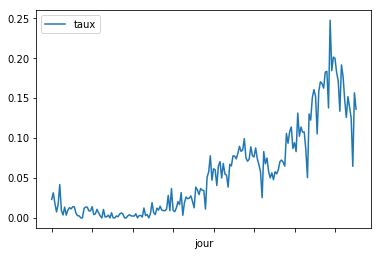

In [68]:
filtre.plot.line(x='jour', y='taux')
plt.show()

# reevaluation de cas positif#

In [69]:
df4 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c', sep=';')

In [70]:
df4.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,3,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5


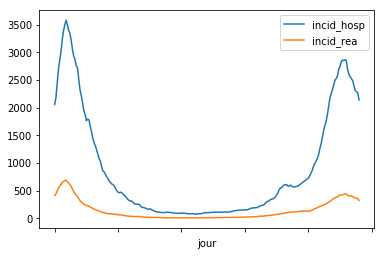

In [71]:
hop=df4.groupby(['jour']).sum()
#hop=hop.diff()
hop = hop.rolling(window=7).mean()
hop=hop[['incid_hosp','incid_rea']]
hop=hop.dropna()
hop.plot.line()
plt.show()

In [72]:
df3.tail()

,dep,jour,P,T,cl_age90
216211,978,2020-11-17,1,4,69
216212,978,2020-11-17,0,5,79
216213,978,2020-11-17,0,1,89
216214,978,2020-11-17,0,0,90
216215,978,2020-11-17,7,61,0


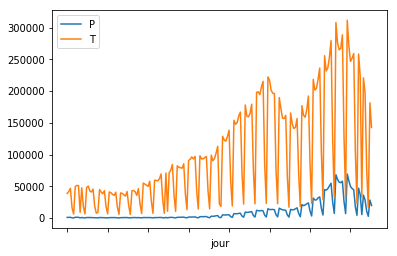

In [73]:
test=df3[df3.cl_age90 == 0].groupby(['jour']).sum()
#test = test.rolling(window=7).mean()
test=test[['P','T']]
test=test.dropna()
test.plot.line()
plt.show()

In [74]:
test.tail()

,P,T
jour,,
2020-11-13,28417,197483
2020-11-14,10662,77043
2020-11-15,2597,16637
2020-11-16,28271,181459
2020-11-17,19645,142612


In [75]:
matrice = pd.concat([hop, test]).sort_index()
matrice=matrice.groupby(['jour']).sum()
matrice.tail(20)

/Users/vanessa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,P,T,incid_hosp,incid_rea
jour,,,,
2020-11-01,6776.0,31776.0,2492.857143,372.142857
2020-11-02,69367.0,311616.0,2526.142857,382.571429
2020-11-03,58465.0,271325.0,2572.285714,388.000000
2020-11-04,49572.0,246655.0,2695.142857,412.000000
2020-11-05,46426.0,251895.0,2749.714286,419.428571
2020-11-06,44512.0,259140.0,2832.142857,421.142857
2020-11-07,17627.0,105045.0,2858.428571,429.000000
2020-11-08,4236.0,22919.0,2848.571429,433.857143
2020-11-09,46950.0,258359.0,2866.142857,441.571429


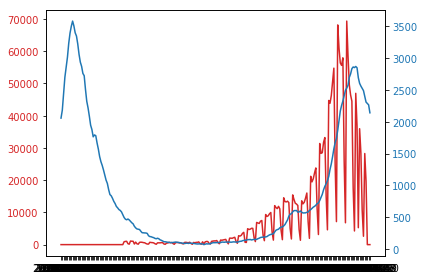

In [76]:
fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(matrice.index.values, matrice[['P']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(matrice.index.values, matrice[['incid_hosp']], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [77]:
matrice['taux']=matrice['P']/matrice['T']
matrice = matrice.rolling(window=7).mean()
matrice=matrice.drop(matrice.index[:-130])

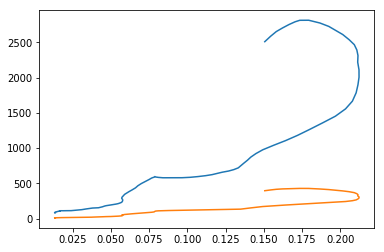

In [78]:
plt.plot(matrice['taux'], matrice['incid_hosp'], '-', matrice['taux'], matrice['incid_rea'], '-')
plt.show()

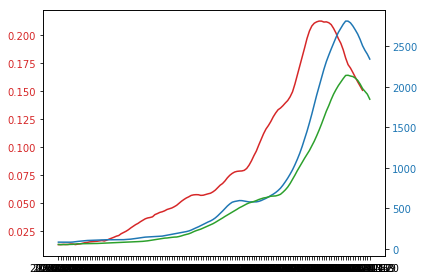

In [79]:
fig, ax1 = plt.subplots()

color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(matrice.index.values, matrice[['taux']], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(matrice.index.values, matrice[['incid_hosp']], color='tab:blue')
ax2.plot(matrice.index.values, matrice[['incid_rea']]*5, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [80]:
matrice['date']=matrice.index
matrice.index = range(0, len(matrice), 1)
matrice= matrice.fillna(0)
matrice.drop(matrice.tail(3).index,inplace=True)
#matrice=matrice.drop(matrice.index[-3])
matrice.tail()

,P,T,incid_hosp,incid_rea,taux,date
122,25032.142857,151595.571429,2752.612245,425.653061,0.166479,2020-11-13
123,24037.142857,147595.285714,2704.551020,421.836735,0.162277,2020-11-14
124,23803.000000,146697.857143,2653.000000,416.244898,0.158174,2020-11-15
125,21134.571429,135712.142857,2586.591837,407.142857,0.154470,2020-11-16
126,18686.428571,124132.000000,2509.734694,396.142857,0.150656,2020-11-17


            4             3            2
-9.942e-09 x + 2.305e-06 x - 0.000154 x + 0.00407 x - 0.007185


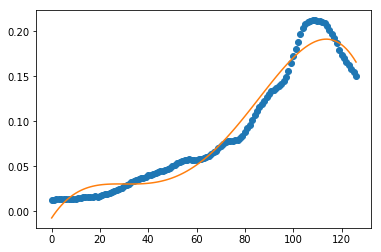

In [81]:
x_data = matrice.index
y_data = matrice['taux']
y_bis=np.log(y_data)
x_bis=range(0, len(matrice)+50, 1)
q = np.poly1d(np.polyfit(x_data, y_data, 4))
print(q)
plt.plot(x_data, y_data, 'o', x_data, q(x_data), '-')
plt.show()

In [82]:
r = np.poly1d(np.polyfit(matrice.index, matrice['incid_hosp'], 4))
s = np.poly1d(np.polyfit(matrice.index, matrice['incid_rea'], 4))

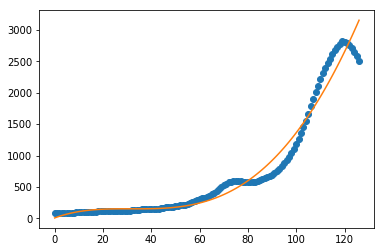

In [83]:
plt.plot(x_data, matrice['incid_hosp'], 'o', x_data, r(x_data), '-')
plt.show()

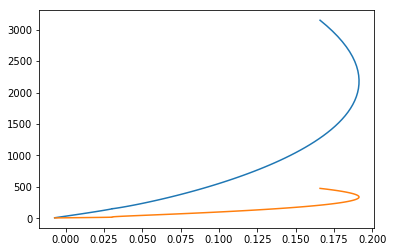

In [84]:
plt.plot(q(x_data), r(x_data), '-',q(x_data), s(x_data), '-')
plt.show()